# Task 1: To Explore Supervised Machine Learning

Task Statement:  
"In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a day?"

**Author: Atul Gopinathan**  
**E-Mail**: atulgopinathan@gmail.com

In [11]:
###### IMPORTS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 

### Fetching the data and creating a dataframe:

In [12]:
!wget http://bit.ly/w-data

--2020-07-16 14:07:40--  http://bit.ly/w-data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores - student_scores.csv [following]
--2020-07-16 14:07:40--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.20.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘w-data.2’

w-data.2            100%[===================>]     212  --.-KB/s    in 0s      

2020-07-16 14:07:51 (4.10 MB/s) - ‘w-data.2’ saved [212/212]



In [13]:
data = pd.read_csv('w-data')
print(data.info())
print("\n\nFirst few values:\n", data.head())

print("\n\nStatistics:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


First few values:
    Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Statistics:
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


**Checking if there are any null values:**

In [14]:
print("Number of NULL values, if any: ", data.isnull().sum().sum())

Number of NULL values, if any:  0


### Visualization

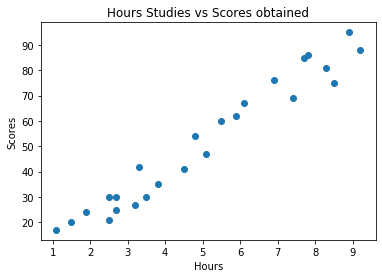

In [15]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours Studies vs Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

We can infer from this graph that there is  direct linear relation between Hours commited to studying and the Scores obtained.

### Splitting data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data['Hours'], data['Scores'], test_size=0.2)

#Converting them to numpy array from Pandas series for convenience
x_train = np.asarray(x_train).reshape(-1,1)
x_test = np.asarray(x_test).reshape(-1,1)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

### Creating model from scratch

In [42]:
### HERE WE CREATE A LINEAR REGRESSION MODEL WHICH USES GRADIENT DESCENT TO OPTIMIZE

class LinearRegressionUsingGD:

    def __init__(self, eta=0.05, n_iterations=9):
        self.eta = eta  # LEARNING RATE
        self.n_iterations = n_iterations

    def fit(self, x, y):
        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        return np.dot(x, self.w_)
    


### Training the model

In [43]:
model = LinearRegressionUsingGD()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


### Calculating the Mean absolute error:     
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.3685929225842415


### Visualizing the best fit line:

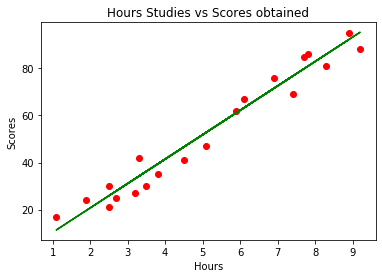

In [44]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, model.predict(x_train), color = "green")
plt.title("Hours Studies vs Scores obtained")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Custom prediction:

In [45]:
print(model.predict([9.5]))

[98.41530603]


Therefore, the score obtained by a student after studying for 9.5 hours is 98.

### Thank You!